In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from IPython.display import display, Markdown
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
# utility block
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
palette = ["#4B0082", "#6500B0", "#8000DE", "#AC3BFF"]
cat_color = ['#BFD7ED','#60A3D9','#0074B7','#003B73']
title_color = '#003B73'
test_color = ['#BFD7ED', '#60A3D9', '#0074B7', '#41729F', '#003B73']
comp_color = ['#FFF4BD', '#F4B9B8', '#85D2D0', '#887BB0', '#BD97CB']
purble = ['#D7A1F9', '#C576F6', '#B24BF3', '#A020F0', '#880ED4', '#6C0BA9', '#51087E']
t='#51087E'

# ['#FFF4BD', '#F4B9B8', '#85D2D0', '#887BB0']    ['#F9D030', '#F62AA0', '#B8EE30', '#26train_dataD0']

g_palette = sns.color_palette(palette)
c_palette = sns.color_palette(cat_color)
com_palette = sns.color_palette(comp_color)
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


++++++++++++++++++++++++++++++++++++++++++++++
Age==>19.87 | Cabin==>77.1 | Embarked==>0.22 | 
++++++++++++++++++++++++++++++++++++++++++++++


<AxesSubplot:>

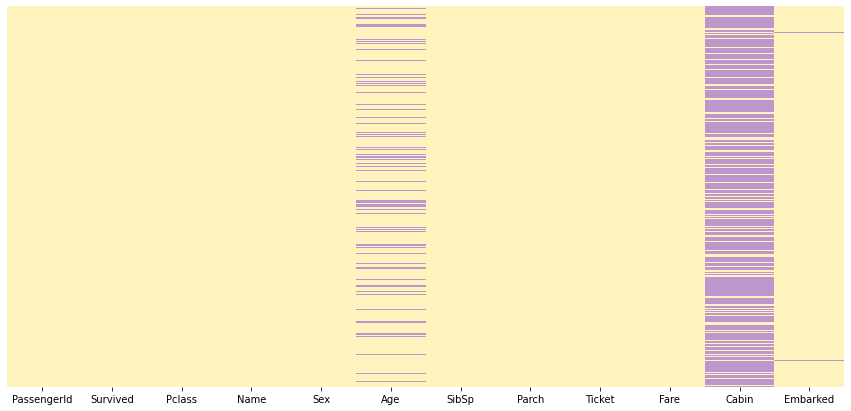

In [6]:
def null_percent(col):
    percentage = round(col.isnull().sum()/len(col)*100,2)
    if percentage > 0:
        print(f'{col.name}==>{percentage} |', end=' ')
print('+'*46)
train_data.apply(null_percent)
print()
print('+'*46)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap=com_palette)

In [7]:
def split_types(train_data):
    num = []
    cat = []
    for col in train_data.columns:
        if len(list(train_data[col].unique())) > 10:
            num.append(col)
        else:
            cat.append(col)
    return [num, cat]



res = split_types(train_data)
num, cat= res
num.remove('Ticket')
num.remove('Cabin')
num.remove('Name')
num.remove('PassengerId')


In [8]:
train_data[num].head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [9]:
num

['Age', 'Fare']

In [10]:
cat

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

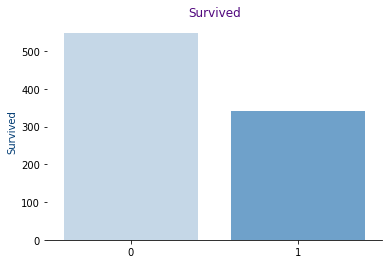

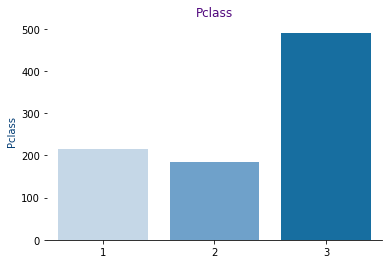

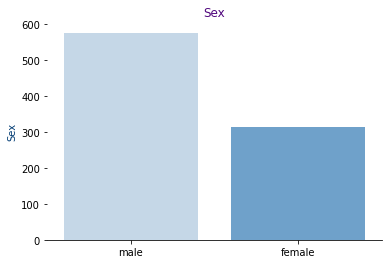

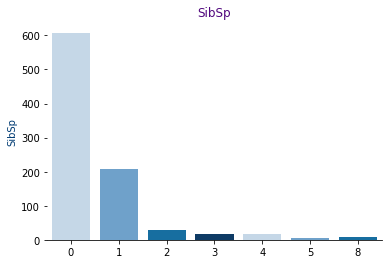

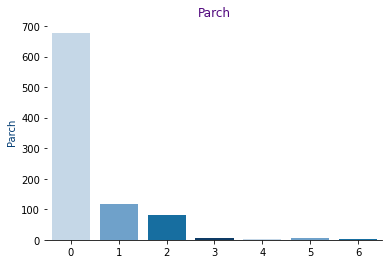

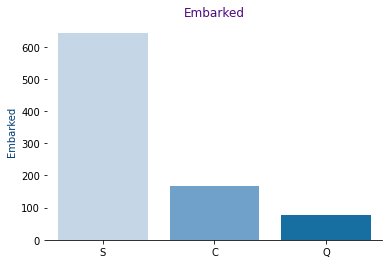

In [11]:
for i in cat:
    count = train_data[i].value_counts()
    ax = sns.barplot(x = count.index , y = count,palette=c_palette)

    # ax.set(xlabel = 'survived                                    Not survived')
    # ax.set_xlabel(' survived                        Not survived', color=title_color)
    ax.set_ylabel(i,color=title_color)
    ax.set_title(i, color=t)
    sns.despine(left=True)
    plt.show()

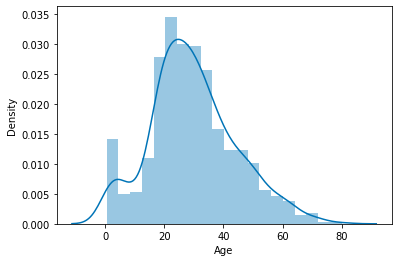

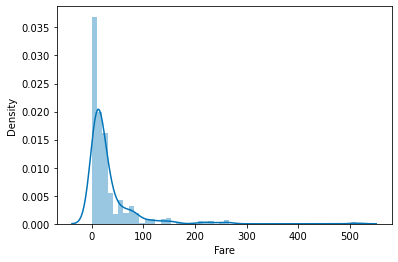

In [12]:
for i in num:
    sns.distplot(train_data[i], color='#0074B7')
    plt.show()

In [13]:
train_data.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

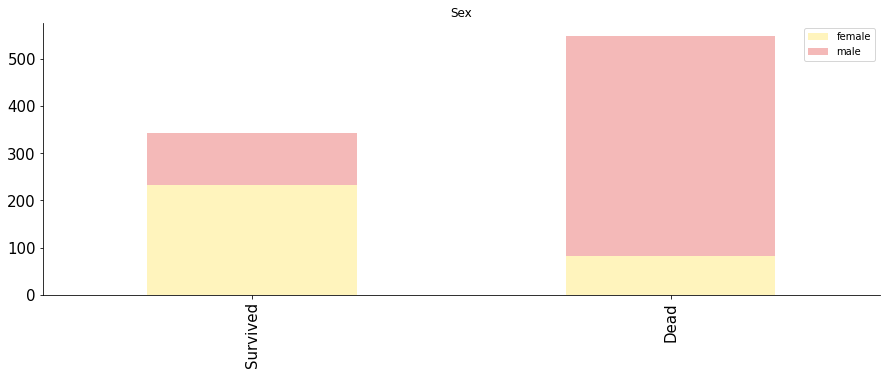

__observations__

- Persentage of Survived female is 26.15% from 35.24% .

- Persentage of Survived male is 12.23% from 64.76% .

- Persentage of Dead female is 9.09% from 35.24% .

- Persentage of Dead male is 52.53% from 64.76% .

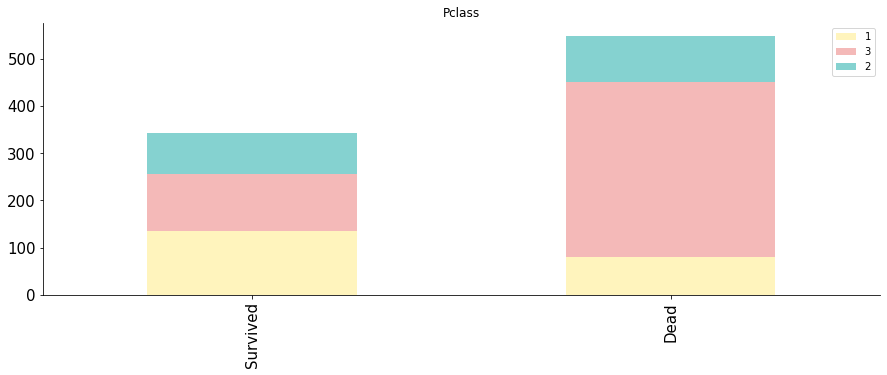

__observations__

- Persentage of Survived 1 is 15.26% from 24.24% .

- Persentage of Survived 3 is 13.36% from 55.11% .

- Persentage of Survived 2 is 9.76% from 20.65% .

- Persentage of Dead 1 is 8.98% from 24.24% .

- Persentage of Dead 3 is 41.75% from 55.11% .

- Persentage of Dead 2 is 10.89% from 20.65% .

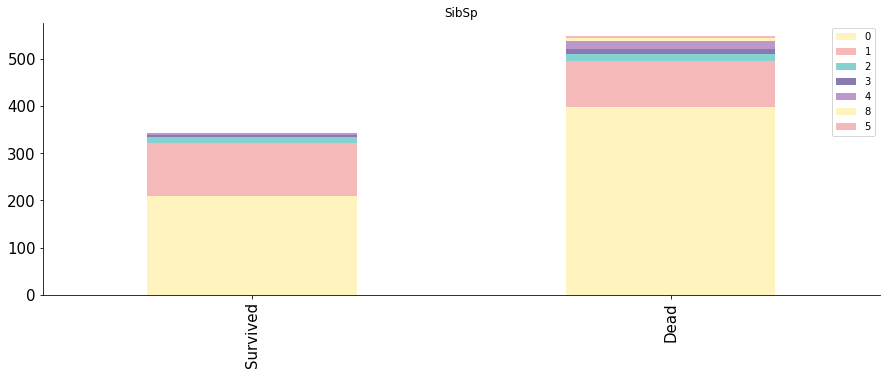

__observations__

- Persentage of Survived 0 is 23.57% from 68.24% .

- Persentage of Survived 1 is 12.57% from 23.46% .

- Persentage of Survived 2 is 1.46% from 3.14% .

- Persentage of Survived 3 is 0.45% from 1.8% .

- Persentage of Survived 4 is 0.34% from 2.02% .

- Persentage of Survived 8 is nan% from 0.79% .

- Persentage of Survived 5 is nan% from 0.56% .

- Persentage of Dead 0 is 44.67% from 68.24% .

- Persentage of Dead 1 is 10.89% from 23.46% .

- Persentage of Dead 2 is 1.68% from 3.14% .

- Persentage of Dead 3 is 1.35% from 1.8% .

- Persentage of Dead 4 is 1.68% from 2.02% .

- Persentage of Dead 8 is 0.79% from 0.79% .

- Persentage of Dead 5 is 0.56% from 0.56% .

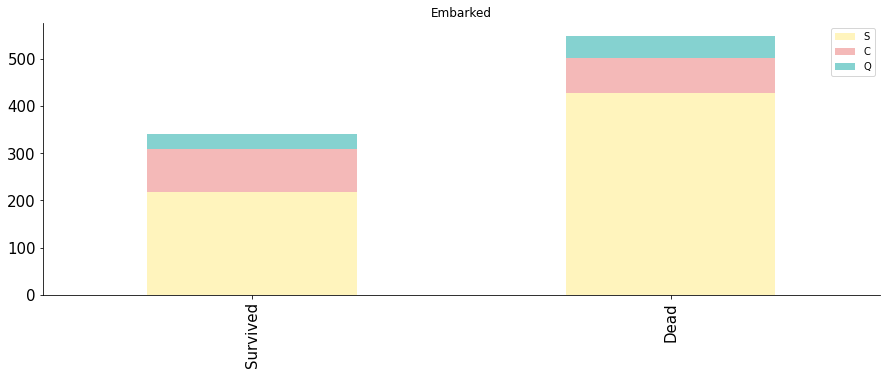

__observations__

- Persentage of Survived S is 24.35% from 72.28% .

- Persentage of Survived C is 10.44% from 18.86% .

- Persentage of Survived Q is 3.37% from 8.64% .

- Persentage of Dead S is 47.92% from 72.28% .

- Persentage of Dead C is 8.42% from 18.86% .

- Persentage of Dead Q is 5.27% from 8.64% .

In [14]:
def percent(dd):
    mp = {}
    for col in dd.columns:
        try:
            mp[col] = round(dd[col].sum()/train_data.shape[0]*100,2)
        except:
            s = 'cant'
    display(Markdown('__observations__'))
    for idx in dd.index:
        for col in dd.columns:
            dd.loc[idx,col] = round(dd.loc[idx,col]/train_data.shape[0]*100,2)
            percentage = dd.loc[idx,col]
            display(Markdown(f'- Persentage of {idx} {col} is {percentage}% from {mp[col]}% .'),)
            


def util(col):
    survived = train_data[train_data['Survived']==1][col].value_counts()
    dead = train_data[train_data['Survived']==0][col].value_counts()
    
    dd = pd.DataFrame([survived,dead])
    dd.index=['Survived','Dead']
    
    
    
    
    dd.plot(kind="bar",stacked=True, figsize=(15,5),title=col,fontsize=15, color=com_palette)
    sns.despine(left=False)
    plt.show()
    percent(dd)
    

cols = ['Sex', 'Pclass', 'SibSp', 'Embarked']
for col in cols:
    util(col)

> deal with outliers

In [15]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace= True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace= True)

# train_data['Embarked'].fillna(train_data['Embarked'].mean(), inplace=True)
# test_data['Embarked'].fillna(test_data['Embarked'].mean(), inplace=True)




In [19]:

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace= True)


In [20]:
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)

In [21]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
def remove(df,ls):
    ls=sorted(set(ls))
    df.drop(ls,inplace = True)


def outliers_list(col,df):
    mean, std = col.mean(), col.std()
    cut_off = mean*3
    upper_cut, lower_cut = mean + cut_off, mean - cut_off
    ls = col.index[(col<lower_cut) | (col>upper_cut)]
    remove(df, ls)

# utility functions
def outliers(col):
    data_mean, data_std = np.mean(col), np.std(col)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    ls = col.index[(col<lower) | (col>upper)]
    return ls



In [23]:
train_data[['Age', 'Fare']].apply(outliers_list,df=train_data)

# ls = outliers_list(train_data['Age'])

Age     None
Fare    None
dtype: object

In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,446.449004,0.368113,2.366940,29.587570,0.518171,0.359906,24.003770
std,258.798263,0.482575,0.806479,12.960041,1.109587,0.790576,23.838119
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,219.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.000000,29.699118,0.000000,0.000000,13.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,28.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,120.000000


> Scale data

In [25]:
# def scale_Fare(a):
#     if int(a) <= 8:
#         return  0
#     elif int(a) > 8 and a <=17:
#         return 1
#     elif int(a) > 17 and a <= 27:
#         return 2
#     elif int(a) >27 and a < 37:
#         return  3
#     else:
#         return  4

In [26]:
# train_data['Fare'] = train_data['Fare'].apply(scale_Fare)
# sns.distplot(train_data[i]+1, color='#0074B7')


In [27]:
train_data[['Age', 'Fare']] = np.sqrt(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = np.sqrt(test_data[['Age', 'Fare']])

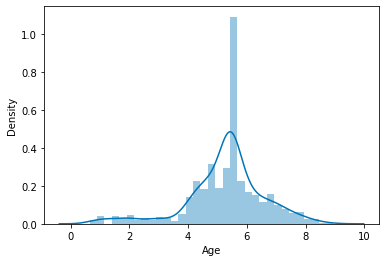

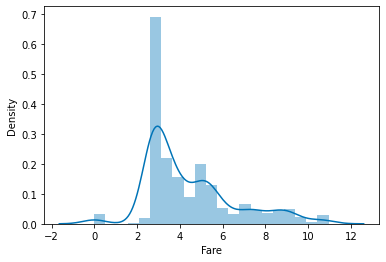

In [28]:
for i in num:
    sns.distplot(train_data[i], color='#0074B7')
    plt.show()

> map categorical data

In [29]:
train_data['Sex']= train_data['Sex'].map({'male':1,'female':0})
test_data['Sex']= test_data['Sex'].map({'male':1,'female':0})

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,4.690416,1,0,A/5 21171,2.692582,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,6.164414,1,0,PC 17599,8.442944,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,5.099020,0,0,STON/O2. 3101282,2.815138,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,5.916080,1,0,113803,7.286975,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,5.916080,0,0,373450,2.837252,NaN,S


In [31]:
train_data['Embarked']= train_data['Embarked'].map({'C':2, 'Q':1,'S':0}) 
test_data['Embarked']= test_data['Embarked'].map({'C':2, 'Q':1,'S':0}) 

In [32]:
drop_list = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_data.drop(drop_list,axis=1,inplace=True)
test_data.drop(drop_list,axis=1,inplace=True)

> Modeling

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier

In [36]:

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [73]:
X = train_data.drop('Survived' , axis = 1 )
y = train_data['Survived']
X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =41)

In [74]:
models={
    "Logistic Regression":LogisticRegressionCV(multi_class='multinomial'),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=4),
}

In [75]:
accuracies = {
    "Name":[],
    "Train_score":[],
    "Test_score":[],
    "precision_score":[],
    "recall_score":[],
    "f1_score":[]
}

In [76]:
for name,model in models.items():
    model.fit(X_train,y_train)
    accuracies['Name'].append(name)
    accuracies['Train_score'].append(model.score(X_train,y_train))
    accuracies['Test_score'].append(model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    accuracies['precision_score'].append(precision_score(y_pred,y_test,average='weighted'))
    accuracies['recall_score'].append(recall_score(y_pred,y_test,average='weighted'))
    accuracies['f1_score'].append(f1_score(y_pred,y_test,average='weighted'))

In [77]:
df_score = pd.DataFrame(accuracies)
df_score

,Name,Train_score,Test_score,precision_score,recall_score,f1_score
0,Logistic Regression,0.800670,0.820312,0.824944,0.820312,0.821810
1,Decision Tree,0.825796,0.843750,0.849760,0.843750,0.845436
